# Sentiment Anaylsis of Yelp Reviews

In [27]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
# load data set
with open('df_by_usr.json', 'r', encoding='UTF-8') as f:
    data = f.readlines()
    df_by_usr_data = list(map(json.loads, data))
    
df_by_usr = pd.DataFrame(df_by_usr_data)

In [3]:
df_by_usr.head()

,avg_star_delta,reviewer_label,text_agg,user_id
0,-0.318182,med,"Ummm, due to the star ratings on Yelp we made ...",--3WaS23LcIXtxyFULJHTA
1,-0.947368,hard,"In my opinion, this restaurant has the best fo...",--4rAAfZnEIAKJE80aIiYg
2,0.333333,med,All is right with the world. After going to th...,--CIuK7sUpaNzalLAlHJKA
3,0.900000,easy,One of the best buffets I have been to for the...,--HCoE1ghaAlcaAfshICgw
4,-0.166667,med,"Great pizza. Pasta is just ok, but the qualit...",--NIc98RMssgy0mSZL3vpA


In [ ]:
len(df_by_usr['text_agg'])

In [4]:
analyzer = SentimentIntensityAnalyzer()
scores = analyzer.polarity_scores(df_by_usr['text_agg'][0])
score = scores['compound']
score

0.9996

In [5]:
df_by_usr['reviewer_label'][1]

'hard'

In [7]:
df_hard = df_by_usr[df_by_usr.reviewer_label=='hard']

In [8]:
len(df_hard)

5738

In [9]:
df_large_delta = df_by_usr[df_by_usr.avg_star_delta > 0.5]

In [10]:
len(df_large_delta)

5910

In [17]:
analyzer = SentimentIntensityAnalyzer()
text = df_large_delta['text_agg']

sentiment = []
for t in text:
    scores = analyzer.polarity_scores(t)
    score = scores['compound']
    sentiment.append(score)

#df_by_user['sentiment_scores'] = sentiment

#scores = analyzer.polarity_scores(text)
#score = scores['compound']

In [25]:
df_large_delta['sentiment_score'] = sentiment

/Users/7of9/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_large_delta.head()

,avg_star_delta,reviewer_label,text_agg,user_id,sentiment_score
3,0.900000,easy,One of the best buffets I have been to for the...,--HCoE1ghaAlcaAfshICgw,0.9996
11,1.033333,easy,First time customer.....daughter's bday choice...,-0dOdNR_GMZq0yHWYuwRaw,0.9999
12,0.678571,easy,This is my all time favorite burger place. Ve...,-0g4b9oK3iptky6YY3vDyQ,0.9995
15,0.666667,easy,Oooh I bet this taco shop got plenty of action...,-1-pTXLHph2vcqRCNeT4_Q,0.9999
20,0.666667,easy,Great place for breakfast. Ask for your potato...,-1ZMRA0N01rqZL0TWk3fgA,0.9992


In [31]:
df_large_delta['sentiment_score'].describe()

count    5910.000000
mean        0.997779
std         0.058103
min        -0.999900
25%         0.999500
50%         0.999800
75%         0.999900
max         1.000000
Name: sentiment_score, dtype: float64

(array([5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 5.903e+03]),
 array([-9.99900e-01, -9.59902e-01, -9.19904e-01, -8.79906e-01,
        -8.39908e-01, -7.99910e-01, -7.59912e-01, -7.19914e-01,
        -6.79916e-01, -6.39918e-01, -5.99920e-01, -5.59922e-01,
        -5.19924e-01, -4.79926e-01, -4.39928e-01, -3.99930e-01,
        -3.59932e-01, -3.19934e-01, -2.79936e-01, -2.39938e-01,
        -1.99940e-01, -1.59942e-01, -1.19944e-01, -7.994

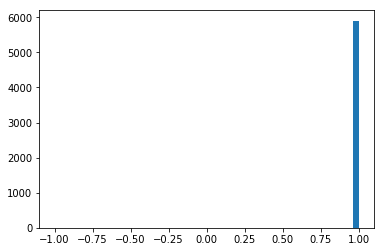

In [30]:
plt.hist(df_large_delta['sentiment_score'], bins=50)

In [32]:
len(df_by_usr)

35051

In [37]:
df_small_delta = df_by_usr[df_by_usr.avg_star_delta < 0.05]

In [38]:
len(df_small_delta)

17307

In [39]:
df_hard = df_by_usr[df_by_usr.reviewer_label == 'hard']

In [41]:
len(df_hard)

5738

In [42]:
# Small delta
text = df_hard['text_agg']

sentiment_hard = []
for t in text:
    scores = analyzer.polarity_scores(t)
    score = scores['compound']
    sentiment_hard.append(score)

In [43]:
df_hard['sentiment_score'] = sentiment_hard

/Users/7of9/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_hard.head()

,avg_star_delta,reviewer_label,text_agg,user_id,sentiment_score
1,-0.947368,hard,"In my opinion, this restaurant has the best fo...",--4rAAfZnEIAKJE80aIiYg,0.9998
5,-0.666667,hard,"At 1200+ reviews, there's basically nothing to...",--WLHsm-AC4jcol2gOkmCQ,0.9991
6,-0.656250,hard,"Popular sandwich place, located on the Vegas s...",-00kdEIhCt-ODaV4BS-EAg,0.9993
10,-0.500000,hard,The food was pretty good. \n\nPrices a little ...,-0Xu57zrI3Rxi8wGZsnWKQ,0.9997
23,-0.527778,hard,"Great Menu, Really cool place, and amazing ser...",-1ksPJf0Eppmxj9ZNCkMRw,0.9998


(array([1.730e+02, 3.900e+01, 1.700e+01, 9.000e+00, 4.000e+00, 1.100e+01,
        5.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 3.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        5.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 4.000e+00,
        7.000e+00, 8.000e+00, 9.000e+00, 4.000e+00, 1.500e+01, 2.600e+01,
        6.300e+01, 5.288e+03]),
 array([-9.9950e-01, -9.5951e-01, -9.1952e-01, -8.7953e-01, -8.3954e-01,
        -7.9955e-01, -7.5956e-01, -7.1957e-01, -6.7958e-01, -6.3959e-01,
        -5.9960e-01, -5.5961e-01, -5.1962e-01, -4.7963e-01, -4.3964e-01,
        -3.9965e-01, -3.5966e-01, -3.1967e-01, -2.7968e-01, -2.3969e-01,
        -1.9970e-01, -1.5971e-01, -1.1972e-01, -7.9730e-02, -3.9740e-02,
         2.

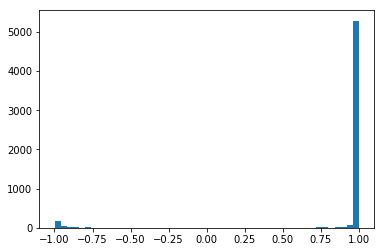

In [46]:
plt.hist(df_hard.sentiment_score, bins=50)